In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
raw_data = pd.read_csv("Real estate.csv")
data =raw_data.copy()

In [3]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
data.columns.values

array(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], dtype=object)

In [7]:
data.drop('No',axis=1,inplace=True)
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
data.rename(columns ={'X1 transaction date':'transaction_date', 'X2 house age':'house_age',
       'X3 distance to the nearest MRT station':'distance_to_the_nearest_MRT_station',
       'X4 number of convenience stores':'number_of_convenience_stores', 'X5 latitude':'latitude', 'X6 longitude':'longitude',
       'Y house price of unit area':'house_price_unit_area'},inplace =True)


In [9]:
features = ['transaction_date', 'house_age',
       'distance_to_the_nearest_MRT_station',
       'number_of_convenience_stores', 'latitude', 'longitude']
x = data[features]


In [10]:
y = data['house_price_unit_area']

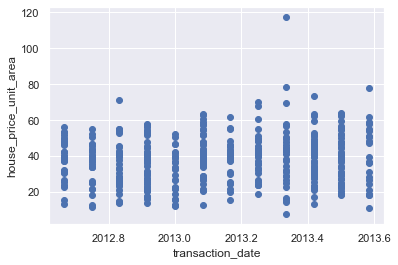

In [11]:
plt.scatter(data['transaction_date'],y)
plt.xlabel("transaction_date")
plt.ylabel("house_price_unit_area")
plt.show()

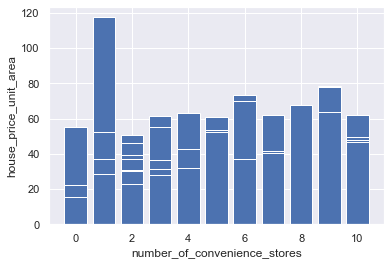

In [12]:
plt.bar(data['number_of_convenience_stores'],y)
plt.xlabel("number_of_convenience_stores")
plt.ylabel("house_price_unit_area")
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='house_price_unit_area', ylabel='Density'>

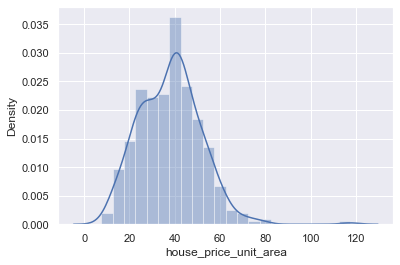

In [13]:
sns.distplot(y)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance_to_the_nearest_MRT_station', ylabel='Density'>

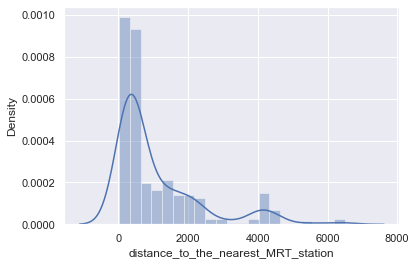

In [14]:
sns.distplot(data['distance_to_the_nearest_MRT_station'])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
shapes = [x_train.shape,x_test.shape,y_train.shape,y_test.shape]
shapes

[(331, 6), (83, 6), (331,), (83,)]

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_scaled

array([[ 0.97619627, -0.05574782, -0.56745274,  1.34961869, -0.09938771,
         0.73495344],
       [ 1.27328444,  0.77308917, -0.59358648,  0.66550876,  0.87524067,
         0.5294848 ],
       [ 1.27328444, -0.78861422, -0.77848947,  0.32345379, -0.16060404,
         0.48125582],
       ...,
       [ 1.27328444, -0.09064622,  0.97118668, -0.36065614, -0.79612618,
        -1.30784092],
       [ 1.27328444, -0.04702322,  2.40894992, -1.38682104, -2.18960311,
        -1.95397704],
       [ 0.37844056,  0.36303298,  0.06555573, -1.38682104, -0.57059234,
         1.10492913]])

In [18]:
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 1.43370372e+00, -1.07181949e+00, -7.81787426e-01,
         1.57738871e+00,  3.36367621e-01,  6.12009739e-01],
       [-1.15552302e+00, -5.36128529e-01, -4.21835432e-01,
         2.48218528e-01,  1.40864888e+00,  6.62404633e-01],
       [-2.45404623e-03,  1.28885255e+00, -4.73994788e-01,
         9.12803621e-01, -4.33816429e-02,  7.43907485e-01],
       [-1.44206412e+00,  1.01646731e+00, -2.63497482e-01,
         9.12803621e-01,  1.02889961e+00,  5.08221595e-02],
       [-8.65529628e-01,  1.79730499e+00, -4.29123658e-01,
        -7.48659110e-01,  4.71117360e-01,  3.40238616e-02],
       [ 2.84087047e-01,  1.18897796e+00, -5.34079405e-01,
        -8.40740177e-02,  9.61933076e-01,  7.07822253e-01],
       [-5.78988535e-01,  5.40394804e-02, -8.04165584e-02,
        -1.41324420e+00, -5.42364010e-01,  1.01081377e+00],
       [ 8.60621536e-01, -1.08997851e+00, -7.81787426e-01,
         1.57738871e+00,  3.36367621e-01,  6.12009739e-01],
       [-1.15552302e+00, -4.37566643e-04,  1.191

In [19]:
reg = LinearRegression()
reg.fit(x_scaled,y_train)
reg.score(x_test_scaled,y_test)

0.6727793308817855

In [20]:
scaler.fit(x)
x = scaler.transform(x)
x

array([[-0.82368321,  1.25562833, -0.79249504,  2.00740743,  1.12542986,
         0.44876222],
       [-0.82368321,  0.15708622, -0.61661163,  1.66750286,  0.91244418,
         0.40113894],
       [ 1.54115111, -0.38779067, -0.41401527,  0.30788458,  1.48686011,
         0.68818339],
       ...,
       [ 0.35873395,  0.09556786, -0.54967846,  0.98769372,  0.82289338,
         0.42397202],
       [-0.52896662, -0.84478419, -0.77668389,  0.30788458, -0.18475479,
         0.4768143 ],
       [ 1.24643452, -0.98539758, -0.78807071,  1.66750286,  0.42757905,
         0.63534112]])

In [21]:
predictions = reg.predict(x)

In [22]:
data.drop(["house_price_unit_area"],axis=1,inplace = True)

In [23]:
data["predictions"]=predictions

In [24]:
data

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,predictions
0,2012.917,32.0,84.87882,10,24.98298,121.54024,46.811718
1,2012.917,19.5,306.59470,9,24.98034,121.53951,47.520056
2,2013.583,13.3,561.98450,5,24.98746,121.54391,48.925018
3,2013.500,13.3,561.98450,5,24.98746,121.54391,48.474722
4,2012.833,5.0,390.56840,5,24.97937,121.54245,46.152794
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,14.586115
410,2012.667,5.6,90.45606,9,24.97433,121.54310,49.501285
411,2013.250,18.8,390.96960,7,24.97923,121.53986,46.797625
412,2013.000,8.1,104.81010,5,24.96674,121.54067,44.833554


In [25]:
import pymysql

In [26]:
conn = pymysql.connect(database = 'predictions', user = 'nativeuser', password = 'Sujay@6476')

In [27]:
cursor = conn.cursor()

In [28]:
cursor.execute('SELECT * FROM predictions;')

0

In [29]:
insert_query = 'INSERT INTO predictions VALUES '

In [30]:
for i in range(data.shape[0]):
    insert_query += '(' 
    
    for j in range(data.shape[1]):
        insert_query += str(data[data.columns.values[j]][i]) + ', '
    
    insert_query = insert_query[:-2] + '), '  

In [31]:
insert_query

'INSERT INTO predictions VALUES (2012.917, 32.0, 84.87882, 10, 24.98298, 121.54024, 46.811717862622864), (2012.917, 19.5, 306.5947, 9, 24.98034, 121.53951, 47.52005559877683), (2013.583, 13.3, 561.9845, 5, 24.98746, 121.54391, 48.92501805179921), (2013.5, 13.3, 561.9845, 5, 24.98746, 121.54391, 48.47472224626102), (2012.833, 5.0, 390.5684, 5, 24.97937, 121.54245, 46.15279394934511), (2012.667, 7.1, 2175.03, 3, 24.96305, 121.51254, 31.305689419887333), (2012.667, 34.5, 623.4731, 7, 24.97933, 121.53642, 38.41540680441196), (2013.417, 20.3, 287.6025, 6, 24.98042, 121.54228, 46.96244574203893), (2013.5, 31.7, 5512.038, 1, 24.95095, 121.48458, 9.272313205414644), (2013.417, 17.9, 1783.18, 3, 24.96731, 121.51486, 35.22531939262863), (2013.083, 34.8, 405.2134, 1, 24.97349, 121.53372, 34.244102421009195), (2013.333, 6.3, 90.45606, 9, 24.97433, 121.5431, 52.92607904673021), (2012.917, 13.0, 492.2313, 5, 24.96515, 121.53737, 40.94946081321124), (2012.667, 20.4, 2469.645, 4, 24.96108, 121.51046, 

In [32]:
insert_query = insert_query[:-2] + ';'

In [33]:
insert_query

'INSERT INTO predictions VALUES (2012.917, 32.0, 84.87882, 10, 24.98298, 121.54024, 46.811717862622864), (2012.917, 19.5, 306.5947, 9, 24.98034, 121.53951, 47.52005559877683), (2013.583, 13.3, 561.9845, 5, 24.98746, 121.54391, 48.92501805179921), (2013.5, 13.3, 561.9845, 5, 24.98746, 121.54391, 48.47472224626102), (2012.833, 5.0, 390.5684, 5, 24.97937, 121.54245, 46.15279394934511), (2012.667, 7.1, 2175.03, 3, 24.96305, 121.51254, 31.305689419887333), (2012.667, 34.5, 623.4731, 7, 24.97933, 121.53642, 38.41540680441196), (2013.417, 20.3, 287.6025, 6, 24.98042, 121.54228, 46.96244574203893), (2013.5, 31.7, 5512.038, 1, 24.95095, 121.48458, 9.272313205414644), (2013.417, 17.9, 1783.18, 3, 24.96731, 121.51486, 35.22531939262863), (2013.083, 34.8, 405.2134, 1, 24.97349, 121.53372, 34.244102421009195), (2013.333, 6.3, 90.45606, 9, 24.97433, 121.5431, 52.92607904673021), (2012.917, 13.0, 492.2313, 5, 24.96515, 121.53737, 40.94946081321124), (2012.667, 20.4, 2469.645, 4, 24.96108, 121.51046, 

In [34]:
insert_query 

'INSERT INTO predictions VALUES (2012.917, 32.0, 84.87882, 10, 24.98298, 121.54024, 46.811717862622864), (2012.917, 19.5, 306.5947, 9, 24.98034, 121.53951, 47.52005559877683), (2013.583, 13.3, 561.9845, 5, 24.98746, 121.54391, 48.92501805179921), (2013.5, 13.3, 561.9845, 5, 24.98746, 121.54391, 48.47472224626102), (2012.833, 5.0, 390.5684, 5, 24.97937, 121.54245, 46.15279394934511), (2012.667, 7.1, 2175.03, 3, 24.96305, 121.51254, 31.305689419887333), (2012.667, 34.5, 623.4731, 7, 24.97933, 121.53642, 38.41540680441196), (2013.417, 20.3, 287.6025, 6, 24.98042, 121.54228, 46.96244574203893), (2013.5, 31.7, 5512.038, 1, 24.95095, 121.48458, 9.272313205414644), (2013.417, 17.9, 1783.18, 3, 24.96731, 121.51486, 35.22531939262863), (2013.083, 34.8, 405.2134, 1, 24.97349, 121.53372, 34.244102421009195), (2013.333, 6.3, 90.45606, 9, 24.97433, 121.5431, 52.92607904673021), (2012.917, 13.0, 492.2313, 5, 24.96515, 121.53737, 40.94946081321124), (2012.667, 20.4, 2469.645, 4, 24.96108, 121.51046, 

In [35]:
cursor.execute(insert_query)

414

In [36]:
conn.commit()

In [37]:
conn.close()